# Word Cloud ภาษาไทย
* wordcloud: https://amueller.github.io/word_cloud/index.html
    * installation:
        * `pip install wordcloud`
        * `conda install -c conda-forge wordcloud`
* pythainlp: https://github.com/PyThaiNLP/pythainlp
    * installation:
        * `pip install pythainlp`

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

In [1]:
import pythainlp
from pythainlp import word_tokenize
from pythainlp.corpus import get_corpus # for getting stopwords

import wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'wordcloud version: {wordcloud.__version__}')
print(f'pythainlp version: {pythainlp.__version__}')

wordcloud version: 1.8.1
pythainlp version: 2.2.6


## อ่านข้อความภาษาไทย

In [3]:
s='''
แม่นี้มีบุญคุณอันใหญ่หลวง
ที่เฝ้าหวง ห่วงลูกแต่หลังเมื่อยังนอนเปล
แม่เราเฝ้าโอ้ละเห่
กล่อมลูกน้อยนอนเปลไม่ห่างหันเห ไปจนไกล

แต่เล็กจนโตโอ้แม่ถนอม
แม่ผ่ายผอมย่อมเกิดจากรักลูกปักดวงใจ
เติบโตโอ้เล็กจนใหญ่
นี่แหละหนาอะไร มิใช่ใดหนาเพราะค่าน้ำนม

ครวญคิดพินิจให้ดี
ค่าน้ำนมแม่นี้
จะมีอะไรเหมาะสม
โอ้ว่าแม่จ๋า ลูกคิดถึงค่าน้ำนม
เลือดในอกผสม กลั่นเป็นน้ำนมให้ลูกดื่มกิน

ค่าน้ำนมควรชวนให้ลูกฝัง
แต่เมื่อหลังเปรียบดังผืนฟ้าหนักกว่าแผ่นดิน
บวช เรียนพากเพียรจนสิ้น
หยดหนึ่งน้ำนมกิน ทดแทนไม่สิ้นพระคุณแม่เอย 
'''
print(s)


แม่นี้มีบุญคุณอันใหญ่หลวง
ที่เฝ้าหวง ห่วงลูกแต่หลังเมื่อยังนอนเปล
แม่เราเฝ้าโอ้ละเห่
กล่อมลูกน้อยนอนเปลไม่ห่างหันเห ไปจนไกล

แต่เล็กจนโตโอ้แม่ถนอม
แม่ผ่ายผอมย่อมเกิดจากรักลูกปักดวงใจ
เติบโตโอ้เล็กจนใหญ่
นี่แหละหนาอะไร มิใช่ใดหนาเพราะค่าน้ำนม

ครวญคิดพินิจให้ดี
ค่าน้ำนมแม่นี้
จะมีอะไรเหมาะสม
โอ้ว่าแม่จ๋า ลูกคิดถึงค่าน้ำนม
เลือดในอกผสม กลั่นเป็นน้ำนมให้ลูกดื่มกิน

ค่าน้ำนมควรชวนให้ลูกฝัง
แต่เมื่อหลังเปรียบดังผืนฟ้าหนักกว่าแผ่นดิน
บวช เรียนพากเพียรจนสิ้น
หยดหนึ่งน้ำนมกิน ทดแทนไม่สิ้นพระคุณแม่เอย 



In [4]:
file_name='mother_lyric.txt'
with open(file_name, encoding='utf8') as f:
    s=f.read()
print(s)

แม่นี้มีบุญคุณอันใหญ่หลวง
ที่เฝ้าหวง ห่วงลูกแต่หลังเมื่อยังนอนเปล
แม่เราเฝ้าโอ้ละเห่
กล่อมลูกน้อยนอนเปลไม่ห่างหันเห ไปจนไกล

แต่เล็กจนโตโอ้แม่ถนอม
แม่ผ่ายผอมย่อมเกิดจากรักลูกปักดวงใจ
เติบโตโอ้เล็กจนใหญ่
นี่แหละหนาอะไร มิใช่ใดหนาเพราะค่าน้ำนม

ครวญคิดพินิจให้ดี
ค่าน้ำนมแม่นี้
จะมีอะไรเหมาะสม
โอ้ว่าแม่จ๋า ลูกคิดถึงค่าน้ำนม
เลือดในอกผสม กลั่นเป็นน้ำนมให้ลูกดื่มกิน

ค่าน้ำนมควรชวนให้ลูกฝัง
แต่เมื่อหลังเปรียบดังผืนฟ้าหนักกว่าแผ่นดิน
บวช เรียนพากเพียรจนสิ้น
หยดหนึ่งน้ำนมกิน ทดแทนไม่สิ้นพระคุณแม่เอย


## แบ่งคำแล้วแยกแต่ละคำด้วยช่องว่าง

In [5]:
words = word_tokenize(s)
print(words)

['แม่', 'นี้', 'มี', 'บุญคุณ', 'อัน', 'ใหญ่หลวง', '\n', 'ที่', 'เฝ้า', 'หวง', ' ', 'ห่วง', 'ลูก', 'แต่', 'หลัง', 'เมื่อ', 'ยัง', 'นอน', 'เปล', '\n', 'แม่', 'เรา', 'เฝ้า', 'โอ้', 'ละ', 'เห่', '\n', 'กล่อม', 'ลูก', 'น้อย', 'นอน', 'เปล', 'ไม่', 'ห่าง', 'หันเห', ' ', 'ไป', 'จน', 'ไกล', '\n', '\n', 'แต่', 'เล็ก', 'จน', 'โต', 'โอ้', 'แม่', 'ถนอม', '\n', 'แม่', 'ผ่ายผอม', 'ย่อม', 'เกิด', 'จา', 'กรัก', 'ลูก', 'ปัก', 'ดวงใจ', '\n', 'เติบโต', 'โอ้', 'เล็ก', 'จน', 'ใหญ่', '\n', 'นี่แหละ', 'หนา', 'อะไร', ' ', 'มิใช่', 'ใด', 'หนา', 'เพราะ', 'ค่าน้ำนม', '\n', '\n', 'ครวญ', 'คิด', 'พินิจ', 'ให้', 'ดี', '\n', 'ค่าน้ำนม', 'แม่', 'นี้', '\n', 'จะ', 'มี', 'อะไร', 'เหมาะสม', '\n', 'โอ้ว่า', 'แม่', 'จ๋า', ' ', 'ลูก', 'คิดถึง', 'ค่าน้ำนม', '\n', 'เลือดในอก', 'ผสม', ' ', 'กลั่น', 'เป็น', 'น้ำนม', 'ให้', 'ลูก', 'ดื่ม', 'กิน', '\n', '\n', 'ค่าน้ำนม', 'ควร', 'ชวน', 'ให้', 'ลูก', 'ฝัง', '\n', 'แต่', 'เมื่อ', 'หลัง', 'เปรียบ', 'ดัง', 'ผืน', 'ฟ้า', 'หนัก', 'กว่า', 'แผ่นดิน', '\n', 'บวช', ' ', 'เรียน', 'พากเพียร', 

In [6]:
all_words = ' '.join(words).lower().strip()
# all_word = re.sub('(\n|\s{2})', '', all_words)
all_words[:500]

'แม่ นี้ มี บุญคุณ อัน ใหญ่หลวง \n ที่ เฝ้า หวง   ห่วง ลูก แต่ หลัง เมื่อ ยัง นอน เปล \n แม่ เรา เฝ้า โอ้ ละ เห่ \n กล่อม ลูก น้อย นอน เปล ไม่ ห่าง หันเห   ไป จน ไกล \n \n แต่ เล็ก จน โต โอ้ แม่ ถนอม \n แม่ ผ่ายผอม ย่อม เกิด จา กรัก ลูก ปัก ดวงใจ \n เติบโต โอ้ เล็ก จน ใหญ่ \n นี่แหละ หนา อะไร   มิใช่ ใด หนา เพราะ ค่าน้ำนม \n \n ครวญ คิด พินิจ ให้ ดี \n ค่าน้ำนม แม่ นี้ \n จะ มี อะไร เหมาะสม \n โอ้ว่า แม่ จ๋า   ลูก คิดถึง ค่าน้ำนม \n เลือดในอก ผสม   กลั่น เป็น น้ำนม ให้ ลูก ดื่ม กิน \n \n ค่าน้ำนม ควร ชวน ให้ ลูก'

In [7]:
# re.sub('(\n|\s{2})', '', all_words)

In [8]:
stopwords = {'นี้', 'อัน', 'แต่', 'ไม่'} # set
print(type(stopwords))
print(stopwords)

<class 'set'>
{'นี้', 'ไม่', 'อัน', 'แต่'}


In [9]:
# stopwords=pythainlp.corpus.thai_stopwords()
# # print(stopwords)
# stopwords=set(list(stopwords)).union({'นี้', 'อัน', 'แต่', 'ไม่'})
# print(stopwords)

## สร้าง Word Cloud
* colormap: https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html
* color name: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
* sample mask images: https://github.com/prasertcbs/img/tree/master/mask

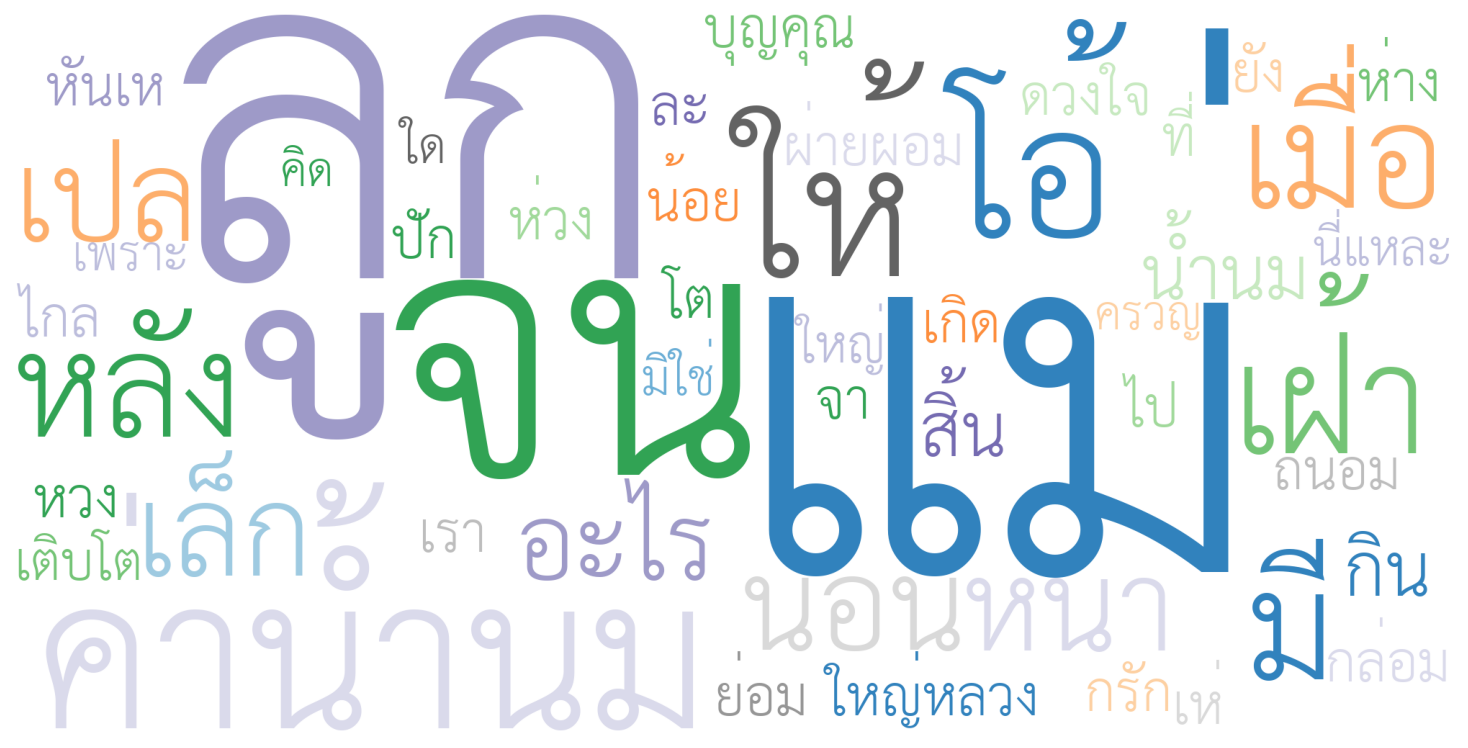

In [10]:
wordcloud = WordCloud(
#     font_path='c:/windows/fonts/browalia.ttc',
    font_path='c:/windows/fonts/thsarabunnew.ttf',
#     font_path='font_path/Kanit-Black.ttf',
#     font_path='font_path/Fahkwang-Medium.ttf',
    regexp='[ก-๙]+',

    stopwords=stopwords,
    width=2000, height=1000,

    prefer_horizontal=1,
    max_words=50, 

#     colormap='viridis', # default matplotlib colormap
    colormap='tab20c',
#     colormap='plasma',
    background_color = 'white').generate(all_words)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
# plt.show()

## สร้าง Word Cloud ตามรูปร่างที่กำหนด

### function สำหรับ download image file จาก web

In [11]:
import requests
import io
def download_img(url, imgfilename=None):
    '''
    download image from url
    '''
    r=requests.get(url)
    return io.BytesIO(r.content)

### อ่าน mask image file (local/web)

In [12]:
# read the mask image
from PIL import Image

# mask_img_file='cloud.png'
# mask_img_file='heart.png'
mask_img_file='two_hearts.png'
# mask_img_file='star.png'
# mask_img_file='person2.png'
# mask_img_file='A_mask.png'

# read mask image file locally
mask = np.array(Image.open(f'mask_image/{mask_img_file}').convert('RGBA'))

# read mask image file from web
# img_url=f'https://github.com/prasertcbs/img/raw/master/mask/{mask_img_file}'
# mask = np.array(Image.open(download_img(img_url)).convert('RGBA'))

### สร้าง Word Cloud
* colormap: https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html
* color name: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
* sample mask images: https://github.com/prasertcbs/img/tree/master/mask

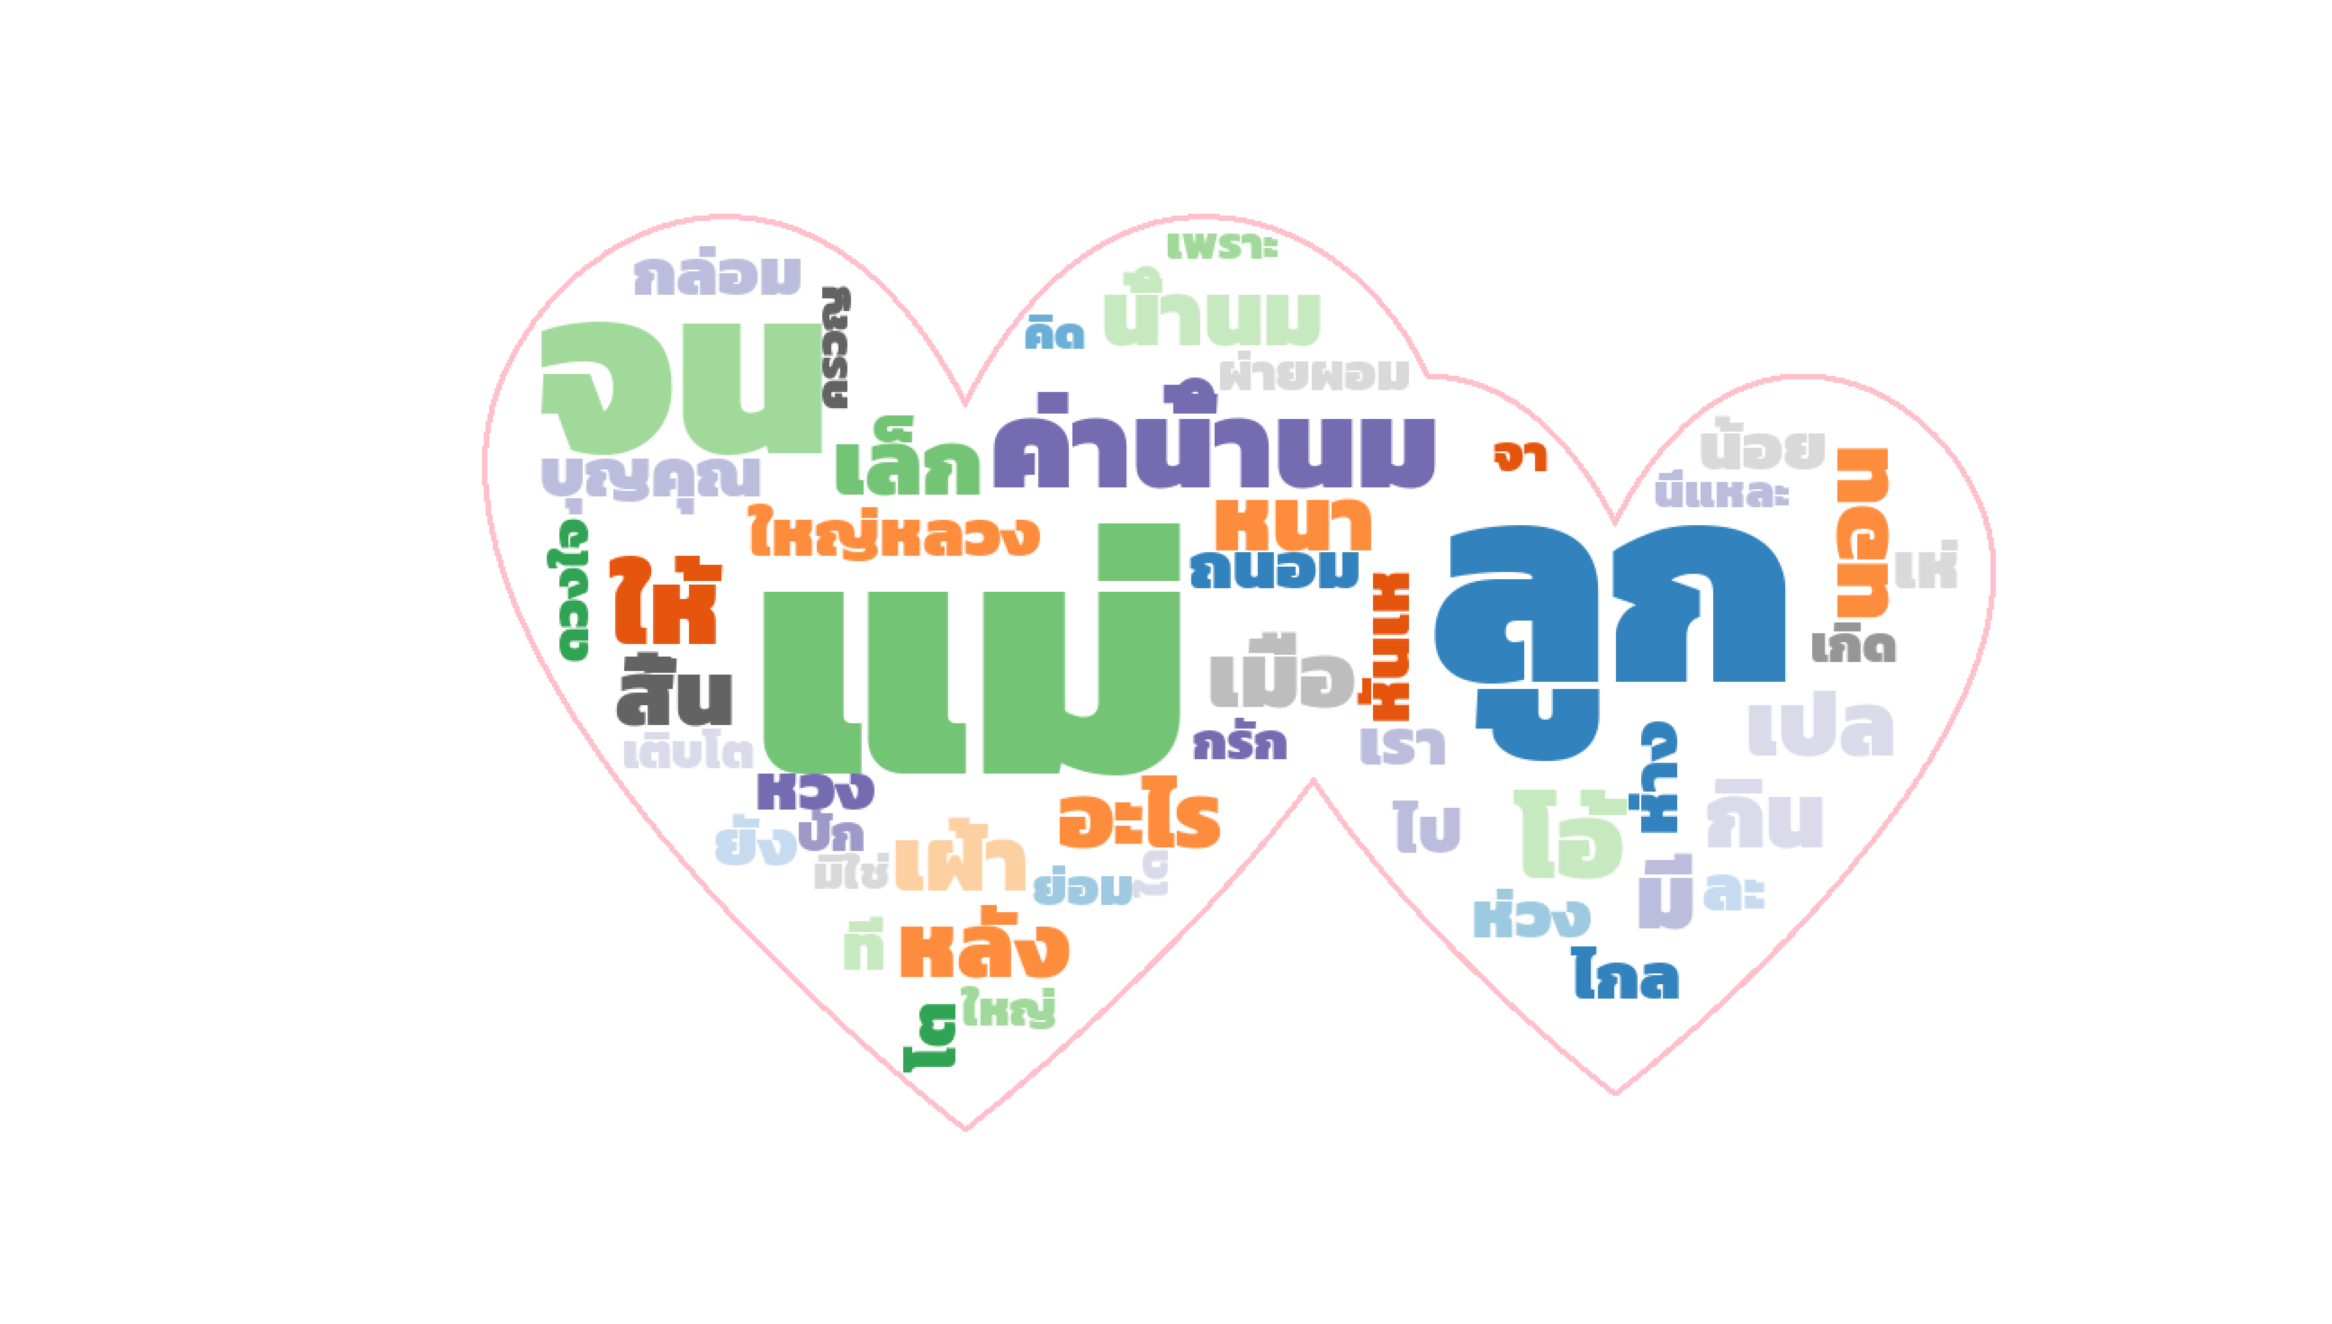

In [13]:
wordcloud = WordCloud(
    font_path='font_path/Kanit-Black.ttf',
#     font_path='c:/windows/fonts/browalia.ttc',
#     font_path='c:/windows/fonts/thsarabunnew.ttf',
    
    stopwords=stopwords,
    width=2000, height=1000,
#     colormap='viridis', # default matplotlib colormap
    colormap='tab20c', # https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html
#     colormap='plasma',
#     max_font_size=50, 
    max_words=50, 
    
    mask=mask,
    contour_width=2,
    contour_color='pink', # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    prefer_horizontal=.9,
    
    regexp='[ก-๙]+',
    background_color = 'white').generate(all_words)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## save word cloud image

In [14]:
wordcloud.to_file("wordcloud2.png")

## word cloud attributes

In [15]:
wordcloud.words_

{'แม่': 1.0,
 'ลูก': 1.0,
 'จน': 0.6666666666666666,
 'ค่าน้ำนม': 0.6666666666666666,
 'โอ้': 0.5,
 'ให้': 0.5,
 'มี': 0.3333333333333333,
 'เฝ้า': 0.3333333333333333,
 'หลัง': 0.3333333333333333,
 'เมื่อ': 0.3333333333333333,
 'นอน': 0.3333333333333333,
 'เปล': 0.3333333333333333,
 'เล็ก': 0.3333333333333333,
 'หนา': 0.3333333333333333,
 'อะไร': 0.3333333333333333,
 'น้ำนม': 0.3333333333333333,
 'กิน': 0.3333333333333333,
 'สิ้น': 0.3333333333333333,
 'บุญคุณ': 0.16666666666666666,
 'ใหญ่หลวง': 0.16666666666666666,
 'ที่': 0.16666666666666666,
 'หวง': 0.16666666666666666,
 'ห่วง': 0.16666666666666666,
 'ยัง': 0.16666666666666666,
 'เรา': 0.16666666666666666,
 'ละ': 0.16666666666666666,
 'เห่': 0.16666666666666666,
 'กล่อม': 0.16666666666666666,
 'น้อย': 0.16666666666666666,
 'ห่าง': 0.16666666666666666,
 'หันเห': 0.16666666666666666,
 'ไป': 0.16666666666666666,
 'ไกล': 0.16666666666666666,
 'โต': 0.16666666666666666,
 'ถนอม': 0.16666666666666666,
 'ผ่ายผอม': 0.16666666666666666,
 'ย่อ

In [16]:
wordcloud.layout_

[(('แม่', 1.0), 187, (283, 410), None, 'rgb(116, 196, 118)'),
 (('ลูก', 1.0), 159, (284, 787), None, 'rgb(49, 130, 189)'),
 (('จน', 0.6666666666666666), 132, (171, 291), None, 'rgb(161, 217, 155)'),
 (('ค่าน้ำนม', 0.6666666666666666),
  70,
  (202, 542),
  None,
  'rgb(117, 107, 177)'),
 (('โอ้', 0.5), 61, (431, 833), None, 'rgb(199, 233, 192)'),
 (('ให้', 0.5), 61, (301, 330), None, 'rgb(230, 85, 13)'),
 (('มี', 0.3333333333333333), 51, (466, 901), None, 'rgb(188, 189, 220)'),
 (('เฝ้า', 0.3333333333333333), 51, (446, 488), None, 'rgb(253, 208, 162)'),
 (('หลัง', 0.3333333333333333), 51, (495, 491), None, 'rgb(253, 141, 60)'),
 (('เมื่อ', 0.3333333333333333), 51, (343, 663), None, 'rgb(189, 189, 189)'),
 (('นอน', 0.3333333333333333), 51, (240, 1012), 2, 'rgb(253, 141, 60)'),
 (('เปล', 0.3333333333333333), 51, (376, 962), None, 'rgb(218, 218, 235)'),
 (('เล็ก', 0.3333333333333333), 51, (223, 455), None, 'rgb(116, 196, 118)'),
 (('หนา', 0.3333333333333333), 51, (269, 666), None, 'rgb(25